In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [88]:
# load dataset
df = pd.read_csv("datasets/bbc-text.csv") # src: https://www.kaggle.com/c/learn-ai-bbc
#df = pd.read_csv("datasets/news_headlines.csv") # src: https://www.kaggle.com/datasets/rmisra/news-category-dataset
# TODO: find sport article dataset or sth similar

df = df.astype(str)
# print first 5 rows

#df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(1000)) # stratify -- take x elements of each category
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


p:\python_projects\searchingsystems\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


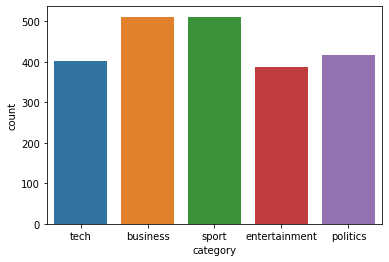

In [89]:
sns.countplot(df.category) # generate class plot
print(df['category'].value_counts()) # print count for each class

p:\python_projects\searchingsystems\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Article length distribution')

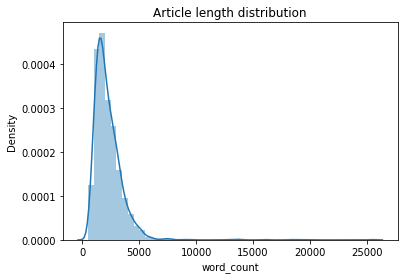

In [90]:
# count number of words in each article

df['word_count'] = df['text'].str.len()
sns.distplot(df['word_count']).set_title('Article length distribution')

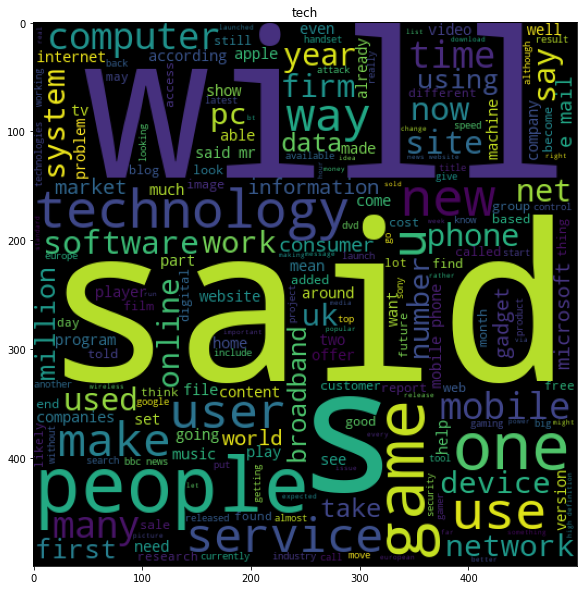

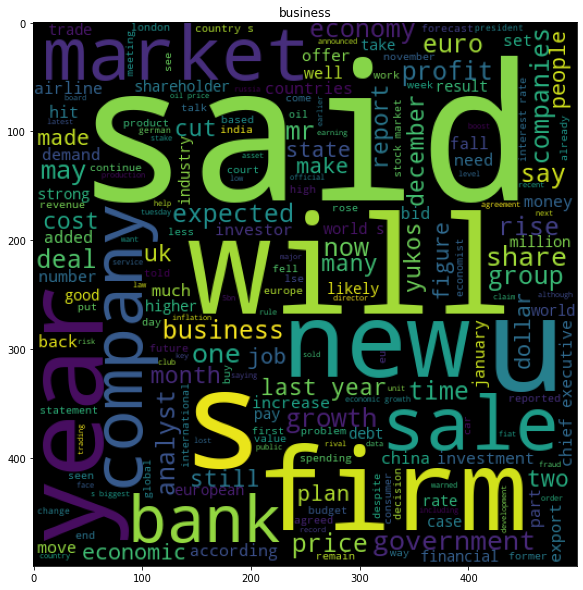

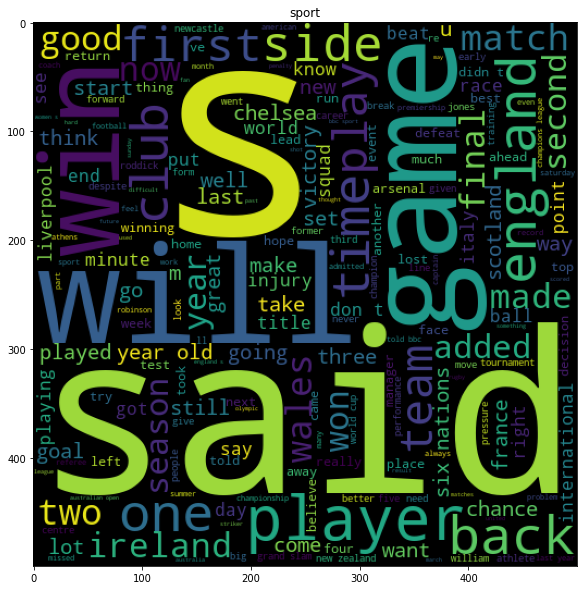

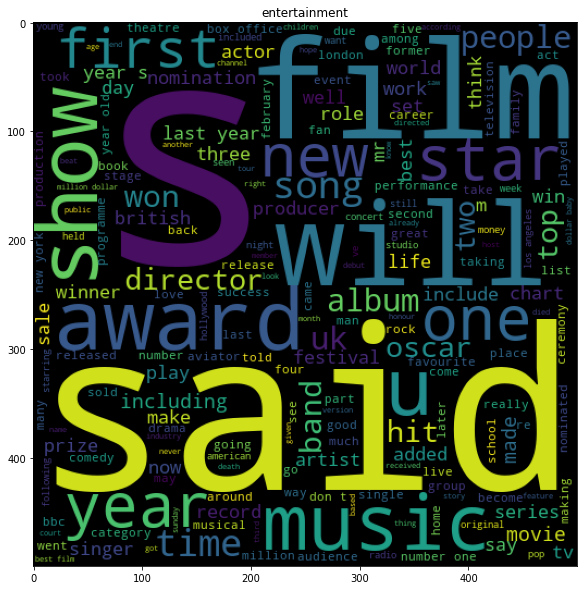

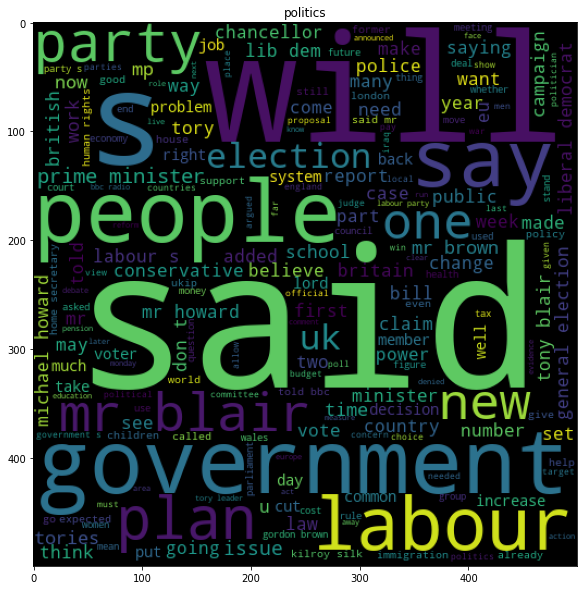

In [91]:
# generate word cloud for each class

def create_wordcloud(words, title):
    wordcloud = WordCloud(width=500, height=500).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.show()

for category in pd.unique(df['category']):
    category_df = df.loc[df['category'] == category]
    txt = ' '.join(category_df.text)
    create_wordcloud(txt, category)

In [92]:
df.head()

,category,text,word_count
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579


In [93]:
def clean_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip() # remove special characters
    text = re.sub(' +', ' ', text) # remove multiple whitespaces
    text = re.sub(r'[^\w\s]', '', text) # remove non-letter characters
    # removing stopwords could be added here
    return text

df['text'] = df['text'].apply(clean_text)
df['word_count'] = df['text'].str.len()
df.head()

,category,text,word_count
0,tech,tv future in the hands of viewers with home th...,4211
1,business,worldcom boss left books alone former worldcom...,1786
2,sport,tigers wary of farrell gamble leicester say th...,1305
3,sport,yeading face newcastle in fa cup premiership s...,2103
4,entertainment,ocean s twelve raids box office ocean s twelve...,1506


In [99]:
X = list(df['text'])
y = list(df['category'])
print(y[:3])

['tech', 'business', 'sport']


In [100]:
# label encoding

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y[:3])

[4 0 3]


In [96]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .8, random_state = 1410)
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 1780, test: 445


In [97]:
# TFIDF
# TF = count of specific word in article / number of words in article
# IDF = log(number of articles containing specific word / number of articles)
# TFIDF = TF * IDF -- for each article

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [26]:
# Bag-of-Words
count_vectorizer = CountVectorizer(analyzer='word', stop_words='english')
X_train = count_vectorizer.fit_transform(X_train).toarray()
X_test = count_vectorizer.transform(X_test).toarray()

In [9]:
# TODO:
# Word2Vec

C:\Users\jpawl\AppData\Local\Temp\ipykernel_6700\3440495887.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
C:\Users\jpawl\AppData\Local\Temp\ipykernel_6700\3440495887.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])


In [98]:
lr_model = LogisticRegression(multi_class="multinomial")
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

models = [lr_model, rf_model, knn_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print(classification_report(y_test,y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.98      0.99        86
           2       0.97      0.99      0.98        77
           3       0.99      1.00      1.00       100
           4       0.99      0.95      0.97        84

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.99      0.90      0.94        86
           2       0.94      0.94      0.94        77
           3       0.97      0.99      0.98       100
           4       0.99      0.95      0.97        84

    accuracy                           0.96       445
   macro avg       0.96      0.95      0.95       445
weighted avg       0.96      0.96  